In [1]:
import pandas as pd

In [3]:
stats2015 = pd.read_csv("the-counted-revised-2015.csv")
stats2016 = pd.read_csv("the-counted-revised-2016.csv")

In [4]:
stats2015.head()

,Unnamed: 0,index,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed,lat,lon
0,0,0,2,Matthew Ajibade,22,Male,Black,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,Death in custody,Chatham County Sheriff's Office,No,32.083541,-81.099834
1,1,1,4,Lewis Lembke,47,Male,White,January,2,2015,4505 SW Masters Loop,Aloha,OR,Gunshot,Washington County Sheriff's Office,Firearm,45.494284,-122.867045
2,2,2,5,Michael Kocher Jr,19,Male,White,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,Struck by vehicle,Kauai Police Department,No,21.918204,-159.618301
3,3,3,6,John Quintero,23,Male,Hispanic/Latino,January,3,2015,500 North Oliver Ave,Wichita,KS,Gunshot,Wichita Police Department,No,37.692236,-97.337545
4,4,4,7,Tim Elliott,53,Male,Asian/Pacific Islander,January,2,2015,600 E Island Lake Dr,Shelton,WA,Gunshot,Mason County Sheriff's Office,Firearm,47.215094,-123.100707


In [5]:
stats2016.head()

,Unnamed: 0,index,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed,lat,lon
0,0,0,2016406,Terry Frost,20,Male,Black,May,25,2016,2692 Madison Rd,Cincinnati,OH,Gunshot,Cincinnati Police Department,Firearm,39.101454,-84.512460
1,1,1,201681,Jeffry Graves,62,Male,White,January,31,2016,36500 Bridgepointe Dr,Newark,CA,Gunshot,Newark Police Department,Firearm,37.529659,-122.040240
2,2,2,20161,Joshua Sisson,30,Male,White,January,1,2016,4200 6th Ave,San Diego,CA,Gunshot,San Diego Police Department,Knife,32.717421,-117.162771
3,3,3,20163,Sean O'Brien,37,Male,White,January,2,2016,100 Washington St,Livingston,MT,Gunshot,Livingston Police Department,Knife,45.662436,-110.561040
4,4,4,201653,Lance Light,54,Male,White,January,2,2016,I-20 and Texas Hwy 70,Sweetwater,TX,Gunshot,Sweetwater Police Department,Firearm,32.470952,-100.405938


In [10]:
stats2015 = stats2015.drop(['Unnamed: 0'],axis=1)
stats2016 = stats2016.drop(['Unnamed: 0'],axis=1)

In [28]:
armed2015 = stats2015.groupby('armed')['index'].count()
armed2016 = stats2016.groupby('armed')['index'].count()

In [29]:
race2015 = stats2015.groupby('raceethnicity')['index'].count()
race2016 = stats2016.groupby('raceethnicity')['index'].count()

In [30]:
how2015 = stats2015.groupby('classification')['index'].count()
how2016 = stats2016.groupby('classification')['index'].count()

In [31]:
armed2015

armed
Disputed                5
Firearm               554
Knife                 152
No                    235
Non-lethal firearm     47
Other                  64
Unknown                45
Vehicle                44
Name: index, dtype: int64

In [32]:
race2015

raceethnicity
Arab-American               4
Asian/Pacific Islander     24
Black                     307
Hispanic/Latino           195
Native American            13
Other                       1
Unknown                    18
White                     584
Name: index, dtype: int64

In [50]:
how2015.iloc?

In [38]:
armed2015.to_json('/Volumes/USB/d3/armed2015.json')
race2015.to_json('/Volumes/USB/d3/race2015.json')
how2015.to_json('/Volumes/USB/d3/how2015.json')
armed2016.to_json('/Volumes/USB/d3/armed2016.json')
race2016.to_json('/Volumes/USB/d3/race2016.json')
how2016.to_json('/Volumes/USB/d3/how2016.json')

In [39]:
from matplotlib import pyplot as plt

In [45]:
plt.pie(how2015,labels=how2015)
plt.show();

In [51]:
armed2015

armed
Disputed                5
Firearm               554
Knife                 152
No                    235
Non-lethal firearm     47
Other                  64
Unknown                45
Vehicle                44
Name: index, dtype: int64

In [52]:
armed2016

armed
Disputed               11
Firearm               506
Knife                 159
No                    170
Non-lethal firearm     46
Other                  84
Unknown                82
Vehicle                35
Name: index, dtype: int64

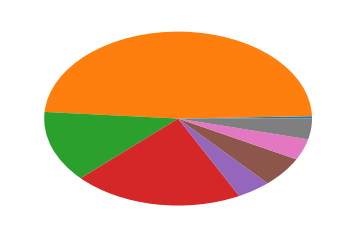

In [53]:
plt.pie(armed2015)
plt.show();

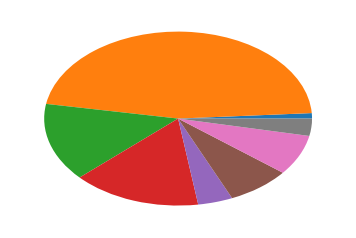

In [54]:
plt.pie(armed2016)
plt.show();

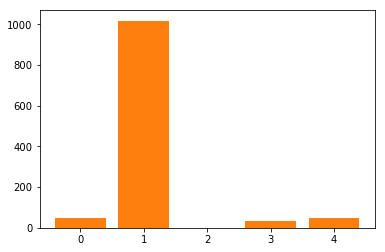

In [58]:
plt.bar(range(len(how2015)),how2015)
plt.show();

In [59]:
stats2015[stats2015['raceethnicity'] == 'Other']

,index,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed,lat,lon
782,782,804,Mohamed Ibrahim,28,Male,Other,September,6,2015,2800 Holly St,Shreveport,LA,Gunshot,Shreveport Police Department,Firearm,32.522183,-93.765194


In [61]:
#looking through the database's sources, there seems to be no evidence that Mohamed Ibrahim is qualified for the race
# section of 'Other'. Therefore, I plan to change this statistic to 'Unknown'.

stats2015['raceethnicity'][782] = 'Unknown'

/Users/jaredarcilla/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
race2015 = stats2015.groupby('raceethnicity')['index'].count()

In [70]:
race2015.to_json('/Volumes/USB/d3/race2015.json')

raceethnicity
Arab-American               4
Asian/Pacific Islander     24
Black                     307
Hispanic/Latino           195
Native American            13
Other                       1
Unknown                    18
White                     584
Name: index, dtype: int64